In [28]:
import pandas as pd
from monai.transforms import LoadImage
from monai.visualize import matshow3d
import matplotlib.pyplot as plt
import pydicom
import os

In [52]:
df_train = pd.read_csv('/kaggle/input/rsna-intracranial-aneurysm-detection/train.csv')
df_train_loc = pd.read_csv('/kaggle/input/rsna-intracranial-aneurysm-detection/train_localizers.csv')

In [53]:
uid = '1.2.826.0.1.3680043.8.498.10035643165968342618460849823699311381'
file_path = f'/kaggle/input/rsna-intracranial-aneurysm-detection/segmentations/{uid}/{uid}.nii'
file_path_cowseg = f'/kaggle/input/rsna-intracranial-aneurysm-detection/segmentations/{uid}/{uid}_cowseg.nii'

In [55]:
df_meta = df_train[df_train.SeriesInstanceUID == uid].copy()
df_meta_loc = df_train_loc[df_train_loc.SeriesInstanceUID == uid].copy()

In [56]:
df_meta

,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
13,1.2.826.0.1.3680043.8.498.10035643165968342618...,62,Female,CTA,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [57]:
loader = LoadImage(image_only=True)
image = loader(file_path)
image_cowseg = loader(file_path_cowseg)
print(image.shape)

torch.Size([512, 512, 228])


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


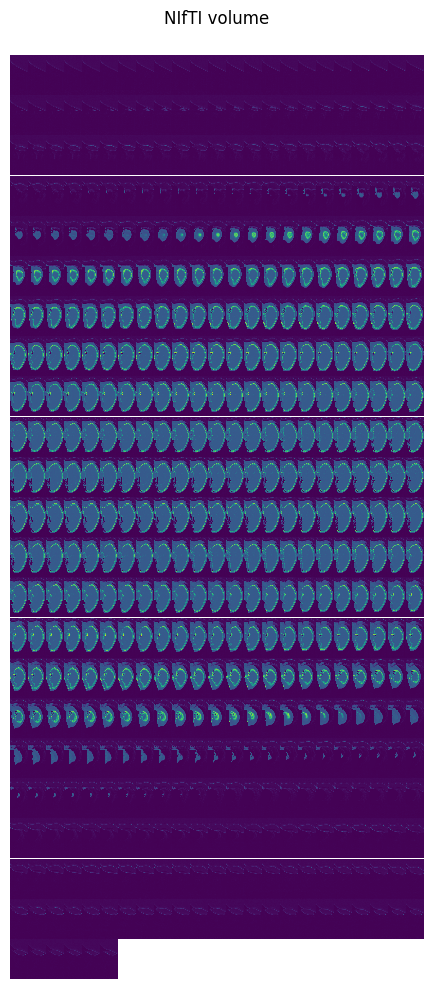

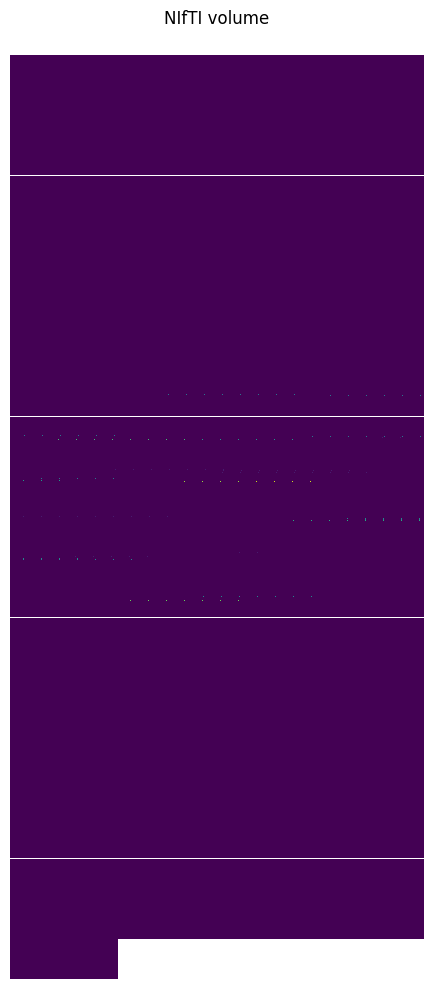

In [59]:
matshow3d(volume=image, title="NIfTI volume")
matshow3d(volume=image_cowseg, title="NIfTI volume")
plt.show()